## Importemos las cosas importantes!

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
#Carguemos los datos!
df = pd.read_csv("data.csv")

In [66]:
df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


Ahora, saquemos de los datos que no nos importa (pero dejamos el identificador!) y lo filtraremos por año tambien pq crearemos un clasificador de los años 80!

In [58]:
df["decade"] = (df["year"]//10)*10

In [59]:
drop_atributos = ["name", "artists", "release_date"]
df.drop(drop_atributos, inplace=True, axis=1)
#normalizamos la popularidad
df["popularity"]=df["popularity"]/df.popularity.max()
#df = df[(1980<=df.year) & (df.year<=1989)]
y = df["decade"]; # nuestra variable a clasificar
X = df[[name for name in df.columns if name not in ["decade","year","id"]]] # el conjunto de datos

Ahora vamos a entrenar a nuestro clasificador con el `DecisionTreeClassifier` con todos los atributos y veremos que sale por el momento!

In [60]:
#Ahora vamos a entrenar a nuestro clasificador con todos los atributos
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=37, stratify=y)

clf = DecisionTreeClassifier(random_state=2)
clf.fit(X_train, y_train)    ## Entrenamos con features X_train y clases y_train

y_pred = clf.predict(X_test)   ## Predecimos con nuevos datos (los de test X_test)

print("Accuracy en test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))## Evaluamos la predicción comparando y_test con y_pred



Accuracy en test set: 0.3933651148647323
              precision    recall  f1-score   support

        1920       0.44      0.45      0.45      1334
        1930       0.36      0.37      0.37      2667
        1940       0.48      0.48      0.48      4490
        1950       0.42      0.42      0.42      5985
        1960       0.41      0.40      0.41      6000
        1970       0.32      0.32      0.32      6000
        1980       0.34      0.34      0.34      6000
        1990       0.29      0.29      0.29      6000
        2000       0.37      0.38      0.38      6000
        2010       0.55      0.54      0.54      5970
        2020       0.24      0.28      0.26       527

    accuracy                           0.39     50973
   macro avg       0.39      0.39      0.39     50973
weighted avg       0.39      0.39      0.39     50973



Podemos ver que no da un resultado tan bueno, obteniendo que los avg son de 0.10 para todas las metricas

Ahora, sabemos de la exploracion que `energy`, `acousticness` y `popularity` tienen una correlacion con los años, entonces veamos que sucede si solo entrenamos al clasificador con estos parametros 

In [64]:
X_new = X[["energy","acousticness","popularity"]]
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=.40, random_state=37, stratify=y)

clf = DecisionTreeClassifier(random_state=2)
clf.fit(X_train, y_train)    ## Entrenamos con features X_train y clases y_train

y_pred = clf.predict(X_test)   ## Predecimos con nuevos datos (los de test X_test)

print("Accuracy en test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred)) ## Evaluamos la predicción comparando y_test con y_pred


Accuracy en test set: 0.31525513507150843
              precision    recall  f1-score   support

        1920       0.26      0.30      0.27      1779
        1930       0.25      0.26      0.25      3556
        1940       0.41      0.40      0.41      5987
        1950       0.36      0.36      0.36      7980
        1960       0.33      0.33      0.33      8000
        1970       0.26      0.26      0.26      8000
        1980       0.26      0.26      0.26      8000
        1990       0.25      0.25      0.25      8000
        2000       0.30      0.29      0.29      8000
        2010       0.45      0.44      0.44      7960
        2020       0.15      0.17      0.16       702

    accuracy                           0.32     67964
   macro avg       0.30      0.30      0.30     67964
weighted avg       0.32      0.32      0.32     67964



Text(114.0, 0.5, 'True label')

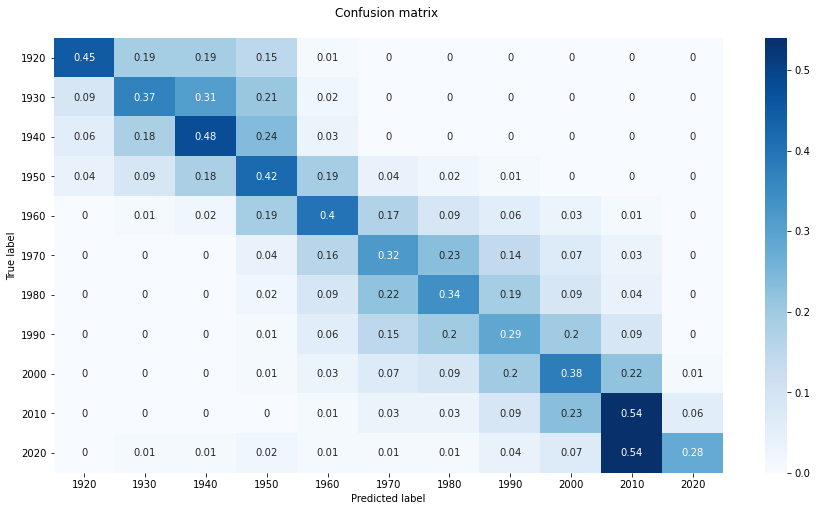

In [61]:
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Compute confusion matrix. By default is not normalized (normalize=None)
# If necessary change 'y_pred' according to your variable name
cm = confusion_matrix(y_test, y_pred,normalize='true')

# Only use the labels that appear in the data
classes = unique_labels(y_test, y_pred)

datos_temp = pd.DataFrame(cm, index=classes, columns=classes)
## Truncamos lso datos para que se vean de pana
datos_temp = np.around(datos_temp, decimals=2)


fig = plt.figure(figsize=(15, 8))

g = sns.heatmap(datos_temp, annot=True, cmap="Blues")
g.set_yticklabels(g.get_yticklabels(), rotation=0)
plt.title('Confusion matrix \n')
plt.xlabel('Predicted label')
plt.ylabel('True label')



Estan bien malos los resultados de la weá, entonces veamos sí hay otras cosas con lo que podamos clasificaar las weaitas, en este caso, intentemoslo con solo acusticidad y popularidad ya que tienen buena correlacion

In [11]:
columnas = ['acousticness','popularity']
X_new = X[columnas]
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=.40, random_state=37, stratify=y)

clf = DecisionTreeClassifier(random_state=2)
clf.fit(X_train, y_train)    ## Entrenamos con features X_train y clases y_train

y_pred = clf.predict(X_test)   ## Predecimos con nuevos datos (los de test X_test)

print("Accuracy en test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred)) ## Evaluamos la predicción comparando y_test con y_pred

Accuracy en test set: 0.31490200694485315
              precision    recall  f1-score   support

        1920       0.28      0.15      0.20      1779
        1930       0.19      0.11      0.14      3556
        1940       0.40      0.70      0.51      5987
        1950       0.37      0.33      0.35      7980
        1960       0.32      0.34      0.33      8000
        1970       0.25      0.27      0.26      8000
        1980       0.25      0.25      0.25      8000
        1990       0.23      0.22      0.23      8000
        2000       0.29      0.26      0.27      8000
        2010       0.46      0.40      0.43      7960
        2020       0.15      0.13      0.14       702

    accuracy                           0.31     67964
   macro avg       0.29      0.29      0.28     67964
weighted avg       0.31      0.31      0.31     67964



In [53]:
from sklearn.model_selection import cross_validate

scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']
cv_results = cross_validate(
    clf, X, y, cv=10, scoring=scoring, return_train_score=True)

print('Promedio Precision:', np.mean(cv_results['test_precision_macro']))
print('Promedio Recall:', np.mean(cv_results['test_recall_macro']))
print('Promedio F1-score:', np.mean(cv_results['test_f1_macro']))
print('Promedio Accucary:', np.mean(cv_results['test_accuracy']))

Promedio Precision: 0.37993645559249184
Promedio Recall: 0.3725098370833141
Promedio F1-score: 0.3692208063888193
Promedio Accucary: 0.3754246895726987


In [13]:
from sklearn.model_selection import cross_validate

scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']
cv_results = cross_validate(
    clf, X_new, y, cv=10, scoring=scoring, return_train_score=True)

print('Promedio Precision:', np.mean(cv_results['test_precision_macro']))
print('Promedio Recall:', np.mean(cv_results['test_recall_macro']))
print('Promedio F1-score:', np.mean(cv_results['test_f1_macro']))
print('Promedio Accucary:', np.mean(cv_results['test_accuracy']))

Promedio Precision: 0.29861262013255685
Promedio Recall: 0.2766000512091609
Promedio F1-score: 0.267773677102371
Promedio Accucary: 0.3032919643883067


In [34]:
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
def run_classifier(clf, X, y, num_tests=100):
    metrics = {'f1-score': [], 'precision': [], 'recall': []}
    
    for _ in range(num_tests):
        #dividiendo los datos de entrenamiento y validación
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)
        
        ### INICIO COMPLETAR ACÁ 
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        
        #### TIP: en base a los set de entrenamiento, genere la variable 'predictions' 
        #### que contiene las predicciones del modelo
        
       
        
        ### FIN COMPLETAR ACÁ
        
        metrics['y_pred'] = predictions
        metrics['f1-score'].append(f1_score(y_test, predictions, average='micro')) 
        metrics['recall'].append(recall_score(y_test, predictions, average='micro'))
        metrics['precision'].append(precision_score(y_test, predictions, average='micro'))
    return metrics

In [35]:
from sklearn.naive_bayes import GaussianNB  # naive bayes
from sklearn.neighbors import KNeighborsClassifier #kNN
from sklearn.svm import SVC  # support vector machine

c0 = ("Gaussian Naive Bayes", GaussianNB())
c1 = ("KNN", KNeighborsClassifier(n_neighbors=10))
c2 = ("Decision Tree", DecisionTreeClassifier())

classifiers = [c0, c1, c2]

results = {}

for name, clf in classifiers:
    metrics = run_classifier(clf, X_new, y)   # hay que implementarla en el bloque anterior.
    results[name] = metrics
    print("----------------")
    print("Resultados para clasificador: ", name) 
    print("Precision promedio:", np.array(metrics['precision']).mean())
    print("Recall promedio:", np.array(metrics['recall']).mean())
    print("F1-score promedio:", np.array(metrics['f1-score']).mean())
    print("")
    print("----------------\n\n")  

----------------
Resultados para clasificador:  Gaussian Naive Bayes
Precision promedio: 0.3760630137523787
Recall promedio: 0.3760630137523787
F1-score promedio: 0.3760630137523787

----------------


----------------
Resultados para clasificador:  KNN
Precision promedio: 0.3641525905871737
Recall promedio: 0.3641525905871737
F1-score promedio: 0.3641525905871737

----------------


----------------
Resultados para clasificador:  Decision Tree
Precision promedio: 0.31704843740803956
Recall promedio: 0.31704843740803956
F1-score promedio: 0.31704843740803956

----------------




In [44]:
X

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,0.9950,0.708,158648,0.1950,0,0.563000,10,0.1510,-12.428,1,0.00,0.0506,118.469,0.7790
1,0.9940,0.379,282133,0.0135,0,0.901000,8,0.0763,-28.454,1,0.00,0.0462,83.972,0.0767
2,0.6040,0.749,104300,0.2200,0,0.000000,5,0.1190,-19.924,0,0.00,0.9290,107.177,0.8800
3,0.9950,0.781,180760,0.1300,0,0.887000,1,0.1110,-14.734,0,0.00,0.0926,108.003,0.7200
4,0.9900,0.210,687733,0.2040,0,0.908000,11,0.0980,-16.829,1,0.01,0.0424,62.149,0.0693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,0.875,163800,0.4430,1,0.000032,1,0.0891,-7.461,1,0.75,0.1430,100.012,0.3060
169905,0.0167,0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,1,0.64,0.0403,128.000,0.2700
169906,0.5380,0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,1,0.70,0.1050,123.700,0.1530
169907,0.0714,0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,1,0.70,0.0385,129.916,0.4720


In [48]:
from sklearn.model_selection import cross_validate
clf =  GaussianNB()
scoring = ['precision_micro', 'recall_macro', 'accuracy', 'f1_macro']
cv_results = cross_validate(
    clf, X, y, cv=10, scoring=scoring, return_train_score=True)

print('Promedio Precision:', np.mean(cv_results['test_precision_micro']))
print('Promedio Recall:', np.mean(cv_results['test_recall_macro']))
print('Promedio F1-score:', np.mean(cv_results['test_f1_macro']))
print('Promedio Accucary:', np.mean(cv_results['test_accuracy']))

Promedio Precision: 0.23119438296956646
Promedio Recall: 0.1807319836494705
Promedio F1-score: 0.16027745216362882
Promedio Accucary: 0.23119438296956646
